In [53]:
import os
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size" : 15, 
                     "figure.dpi" : 100, 
                     "legend.fontsize" : 13, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True, 
                     "figure.figsize":(6, 5)})

In [26]:
files = [f for f in os.listdir() if "pickle" in f]

In [27]:
results = {}
for file in files:
    splitted = file.split("_")
    p, lr, k = int(splitted[0]), int(splitted[1]), splitted[2].split(".")[0]
    if k not in results:
        results[k] = {}
    if lr not in results[k]:
        results[k][lr] = {}
    with open(file, "rb") as f:
        values = pickle.load(f)
    results[k][lr][p] = values

p=1 | mean : 0.873 | var : 0.002 | max : 0.925
p=2 | mean : 0.874 | var : 0.001 | max : 0.924
p=3 | mean : 0.888 | var : 0.001 | max : 0.940
p=4 | mean : 0.871 | var : 0.001 | max : 0.936

p=1 | mean : 0.873 | var : 0.002 | max : 0.923
p=2 | mean : 0.895 | var : 0.001 | max : 0.942
p=3 | mean : 0.880 | var : 0.002 | max : 0.931
p=4 | mean : 0.889 | var : 0.001 | max : 0.940

p=1 | mean : 0.868 | var : 0.002 | max : 0.955
p=2 | mean : 0.856 | var : 0.003 | max : 0.926
p=3 | mean : 0.881 | var : 0.002 | max : 0.942
p=4 | mean : 0.846 | var : 0.012 | max : 0.939

p=1 | mean : 0.832 | var : 0.006 | max : 0.931
p=2 | mean : 0.779 | var : 0.022 | max : 0.935
p=3 | mean : 0.823 | var : 0.020 | max : 0.964
p=4 | mean : 0.824 | var : 0.029 | max : 0.919



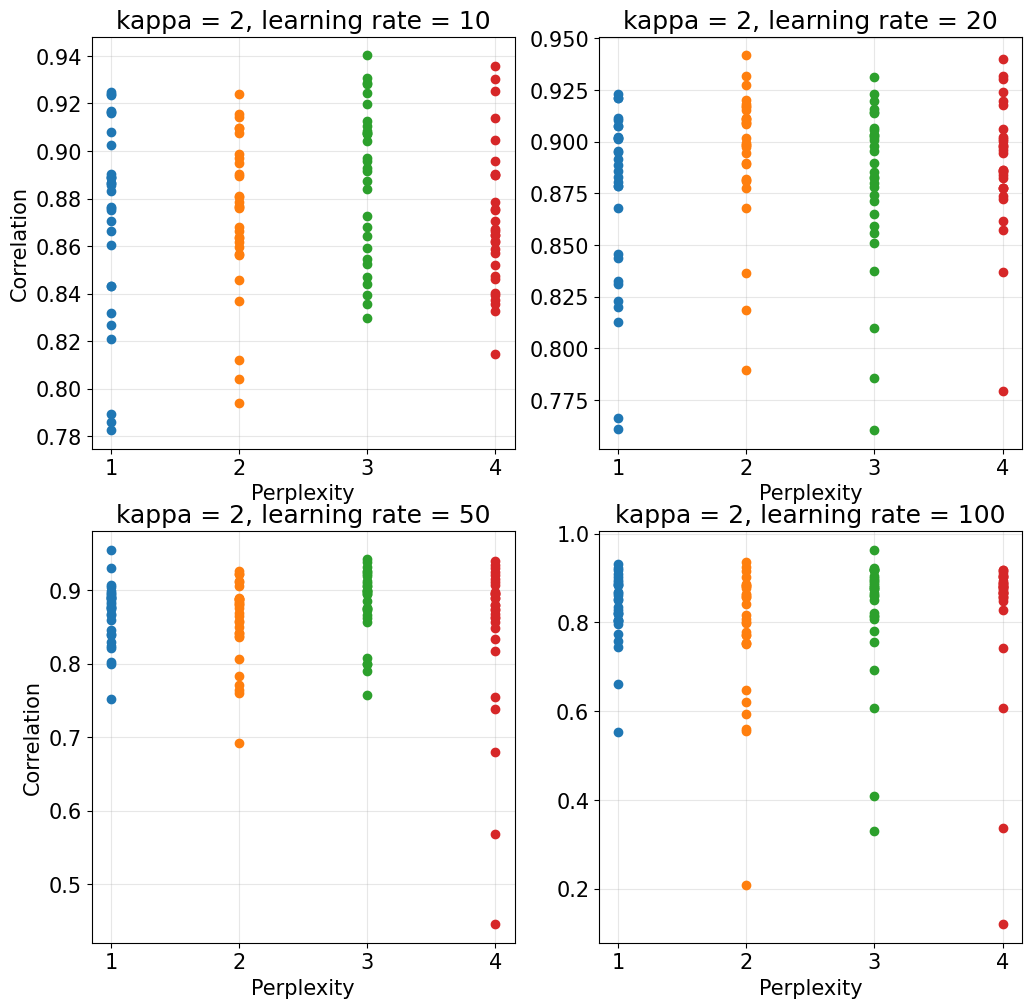

p=1 | mean : 0.904 | var : 0.001 | max : 0.955
p=2 | mean : 0.888 | var : 0.001 | max : 0.952
p=3 | mean : 0.893 | var : 0.001 | max : 0.932
p=4 | mean : 0.885 | var : 0.001 | max : 0.931

p=1 | mean : 0.894 | var : 0.001 | max : 0.939
p=2 | mean : 0.902 | var : 0.001 | max : 0.940
p=3 | mean : 0.902 | var : 0.000 | max : 0.939
p=4 | mean : 0.887 | var : 0.001 | max : 0.938

p=1 | mean : 0.886 | var : 0.002 | max : 0.944
p=2 | mean : 0.867 | var : 0.009 | max : 0.938
p=3 | mean : 0.892 | var : 0.002 | max : 0.953
p=4 | mean : 0.865 | var : 0.008 | max : 0.946

p=1 | mean : 0.877 | var : 0.002 | max : 0.943
p=2 | mean : 0.845 | var : 0.023 | max : 0.952
p=3 | mean : 0.805 | var : 0.021 | max : 0.923
p=4 | mean : 0.793 | var : 0.031 | max : 0.940



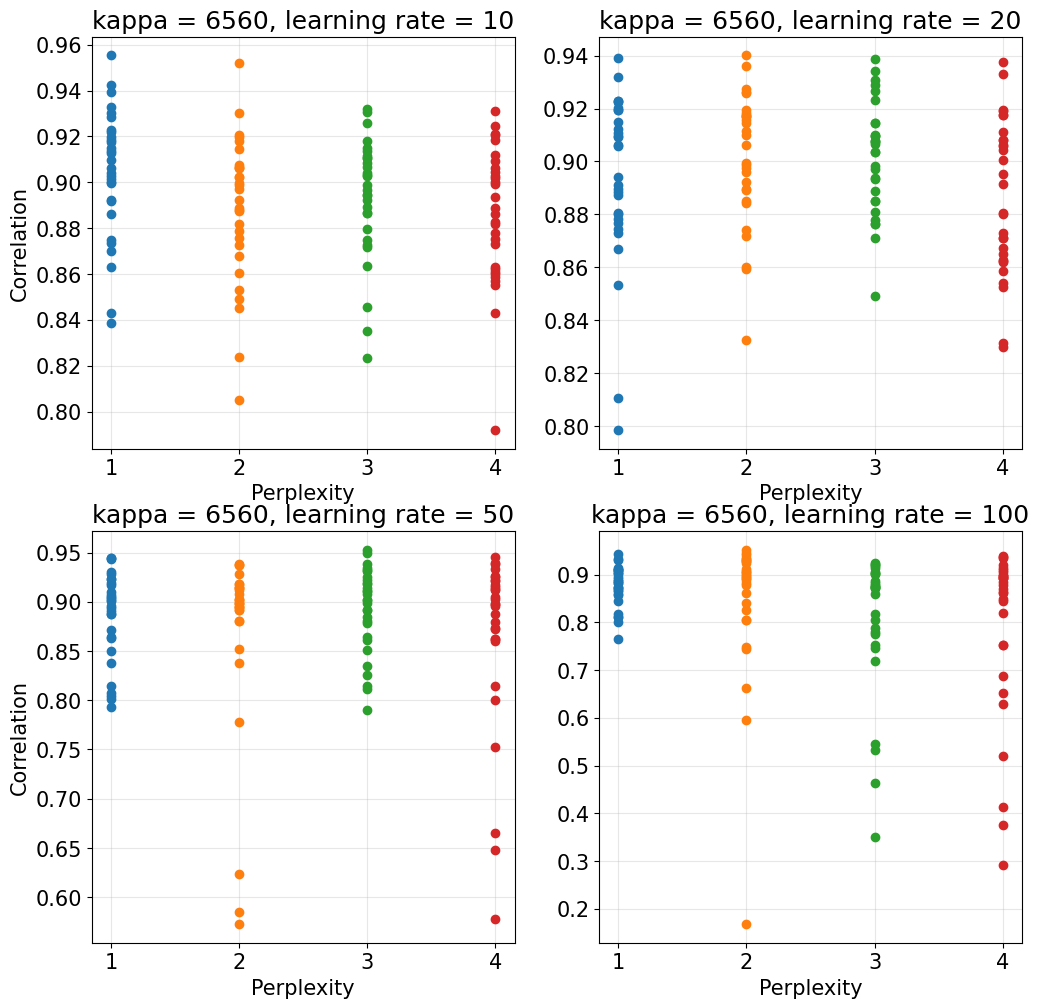

In [80]:
for k in sorted(list(results.keys())):
    lr_dict = results[k]
    plt.figure(figsize=(12,12))
    for j, lr in enumerate(sorted(list(lr_dict.keys()))):
        perplexity_dict = lr_dict[lr]
        perplexities = sorted(list(perplexity_dict.keys()))
        plt.subplot(int("22"+str(j+1)))
        for i,p in enumerate(perplexities):
            plt.scatter([i]*30, perplexity_dict[p])
            print(f"p={p} | mean : {np.mean(perplexity_dict[p]):.3f} | var : {np.var(perplexity_dict[p]):.3f} | max : {max(perplexity_dict[p]):.3f}")
        print()
        plt.title(f"kappa = {k}, learning rate = {lr}")
        plt.xticks(np.arange(len(perplexities)), perplexities)
        plt.xlabel("Perplexity")
        if j in [0, 2]:
            plt.ylabel("Correlation")
    plt.savefig(f"kappa_{k}.pdf")
    plt.show()